In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()


In [5]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston_df = boston_data.data

In [8]:
boston_df

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
boston_datadf = pd.DataFrame(boston_df,columns=boston_data['feature_names'])

In [13]:
boston_datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
boston_datadf['MEDV'] = boston_data.target

In [15]:
boston_datadf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
boston_datadf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
boston_datadf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

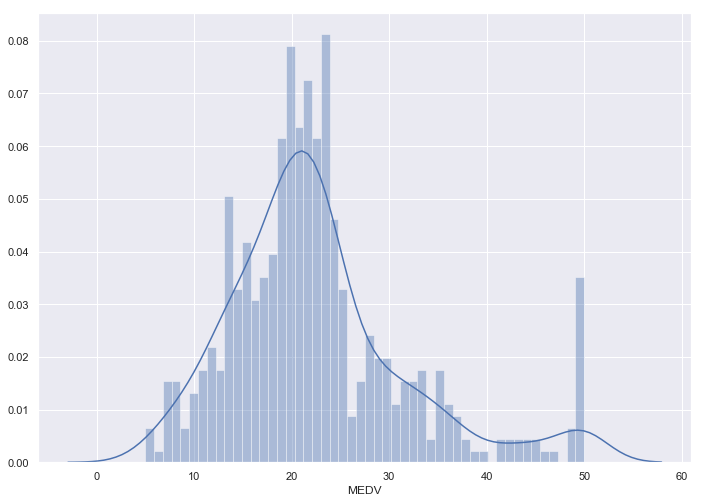

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_datadf['MEDV'], bins=50)

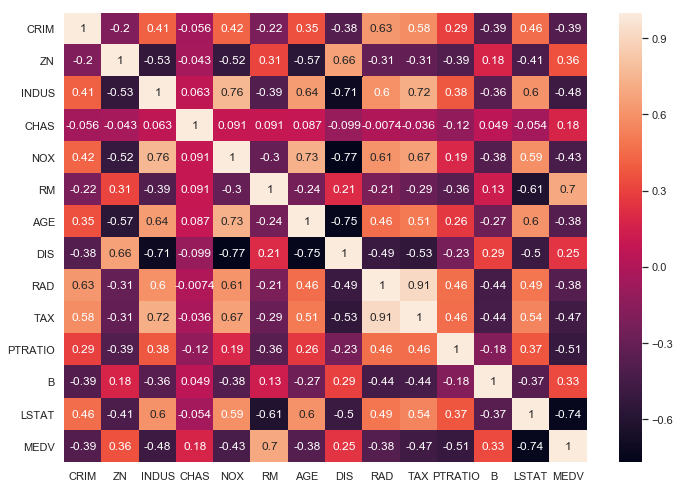

In [24]:
correlation_matrix = boston_datadf.corr()
sns.heatmap(data=correlation_matrix, annot=True)

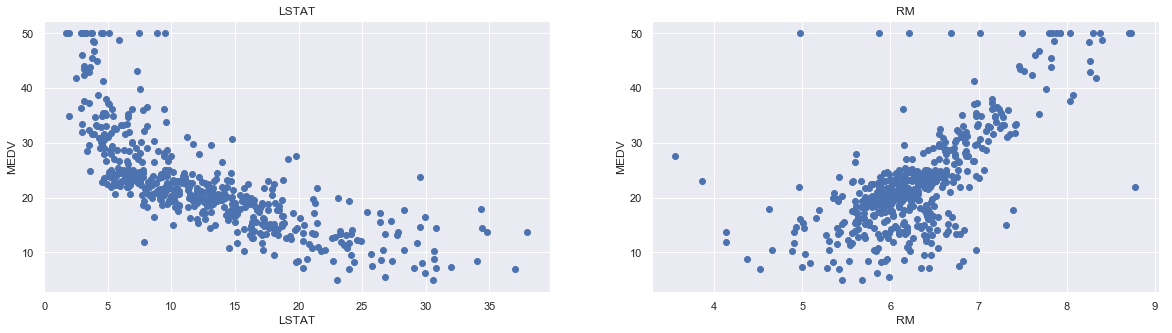

In [26]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = boston_datadf['MEDV']
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=boston_datadf[col]
    y=target
    plt.scatter(x,y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [27]:
X = pd.DataFrame(np.c_[boston_datadf['LSTAT'], boston_datadf['RM']], columns=['LSTAT','RM'])
y = boston_datadf['MEDV']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test,  Y_train,Y_test,= train_test_split(X,y,test_size=0.2,random_state=5)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
# r2= r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911


In [42]:
X = boston_datadf[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [45]:
y = boston_datadf['MEDV']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=101)

In [47]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print(lin_model.intercept_)

26.613733604470553


In [50]:
lin_model.coef_

array([-9.90399671e-02,  2.94959776e-02,  8.41325561e-02,  2.22141124e+00,
       -1.46481290e+01,  4.51750204e+00, -1.11247222e-02, -1.05707649e+00,
        2.03933580e-01, -1.10050120e-02, -8.93674312e-01,  9.79745272e-03,
       -4.43411048e-01])

In [51]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [52]:
cdf = pd.DataFrame(lin_model.coef_,X.columns, columns=['Coeff'])

In [53]:
cdf

,Coeff
CRIM,-0.099040
ZN,0.029496
INDUS,0.084133
CHAS,2.221411
NOX,-14.648129
RM,4.517502
AGE,-0.011125
DIS,-1.057076
RAD,0.203934
TAX,-0.011005


In [54]:
predictions = lin_model.predict(X_test)

In [55]:
predictions

array([39.76384635, 28.33908536, 14.7254218 , 16.49957795, 30.08794675,
       32.1560256 , 39.52539317,  9.6915899 , 32.54783391,  6.80955775,
       29.1884084 , 14.34106496, 15.88344003, 17.87978617, 24.09679246,
       17.55081072,  5.79756177, 32.01448681, 27.76007565, 24.58267812,
       12.07753394, 21.24051344, 21.73997941, 26.31588589, 33.20690839,
       17.93271787, 30.33297182, 19.44487573, 23.08737613, 34.32187997,
       20.58585818, 17.9300437 , 36.52953074, 43.35645745, 30.17391054,
       22.73591957, 15.13401858, 17.76716298,  4.95477426, 29.18831139,
       23.32416821, 17.17659651, 35.10898119, 12.65419707, 16.99096004,
       25.11734205, 30.28252604, 16.95902442, 26.34296018, 24.72576747,
       32.14391409, 36.86539901, 22.11582379, 12.78368437, 30.76284079,
       -0.53628483, 19.58960622, 16.42296751, 22.18255061, 18.35245169,
       30.40938815,  4.88446042, 10.40256558, 20.56599685,  8.94824577,
       24.0728423 , 24.40954268, 20.28184938, 17.64846946, 18.92

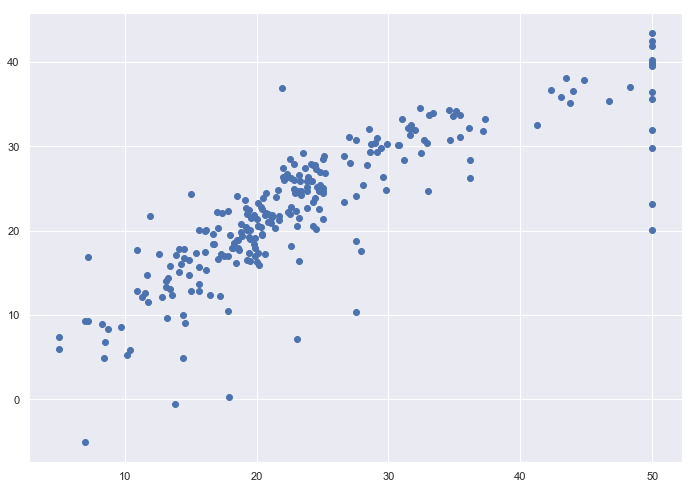

In [56]:
plt.scatter(y_test, predictions)

In [58]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)


3.543913858741617

In [59]:
metrics.mean_squared_error(y_test,predictions)

30.55779440308188

In [60]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

5.5279104915946204